# Download MICECAT data

In [55]:
from micecat_auto import *

In [8]:
# automatically query MICECAT data in a list of icat, and save in
# mypaths['MCcatdat'] + 'all_fields/' + 'micecat_%d.csv.bz2'%icat

#run_micecat_query(np.arange(241,400))

In [9]:
# run 2-halo stacking, in batch of 20 MICECAT fields

#run_micecat_auto_batch(1,0,istart=200)

#### check missing file

In [2]:
from ciber_info import *
icat_arr = np.arange(0,400)
for icat in icat_arr:
    fdir = mypaths['MCcatdat'] + 'all_fields/'
    fname = 'micecat_%d.csv.bz2'%icat
    if fname not in os.listdir(mypaths['MCcatdat'] + 'all_fields/'):
        print(fname + 'does not exist!')

# Compare 2-halo stacking 90 & 400 MICECAT fields

/Users/ytcheng/anaconda3/lib/python3.5/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "


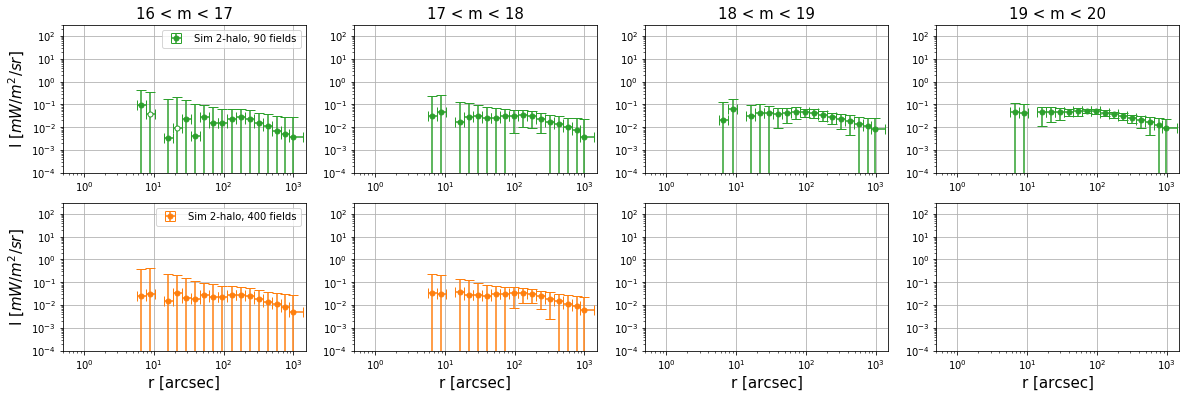

In [13]:
from utils import *
from micecat import *
from micecat_auto import *

for inst in [1]:
    fig, ax = plt.subplots(2, 4, figsize = (20,6))
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):

        rbins, mc_avg, mc_std, _ = get_micecat_sim_cen(inst, im, filt_order=0, sub=False)
        plot_err_log(rbins, 
                 mc_avg, mc_std,
                 ax=ax[0][im], color='C2',label='Sim 2-halo, 90 fields')
        
        rbins, mc_avg, mc_std, _ = get_micecat_sim_cen_auto(inst, im, filt_order=0, sub=False)
        plot_err_log(rbins, 
                 mc_avg, mc_std,
                 ax=ax[1][im], color='C1',label='Sim 2-halo, 400 fields')

        ax[0][im].set_ylim([1e-4,3e2])
        ax[0][im].set_xlim([5e-1,1.5e3])
        ax[0][im].set_title('%d < m < %d'%(m_min, m_max), fontsize=15)
        ax[0][im].grid()    
        
        ax[1][im].set_ylim([1e-4,3e2])
        ax[1][im].set_xlim([5e-1,1.5e3])
        ax[1][im].grid()    
        ax[1][im].set_xlabel('r [arcsec]', fontsize=15)

    ax[0][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
    ax[0][0].legend(fontsize=10)
    ax[1][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
    ax[1][0].legend(fontsize=10)

# fig.savefig('/Users/ytcheng/Desktop/morefields.png',
#              dpi = 150, bbox_inches='tight')

# 2-halo filtering

/Users/ytcheng/ciber/python_ciber/stack_modelfit/utils_plotting.py:78: RuntimeWarning: invalid value encountered in greater_equal
  spp = np.where(y>=0)[0]
/Users/ytcheng/ciber/python_ciber/stack_modelfit/utils_plotting.py:79: RuntimeWarning: invalid value encountered in less
  spn = np.where(y<0)[0]
No handles with labels found to put in legend.


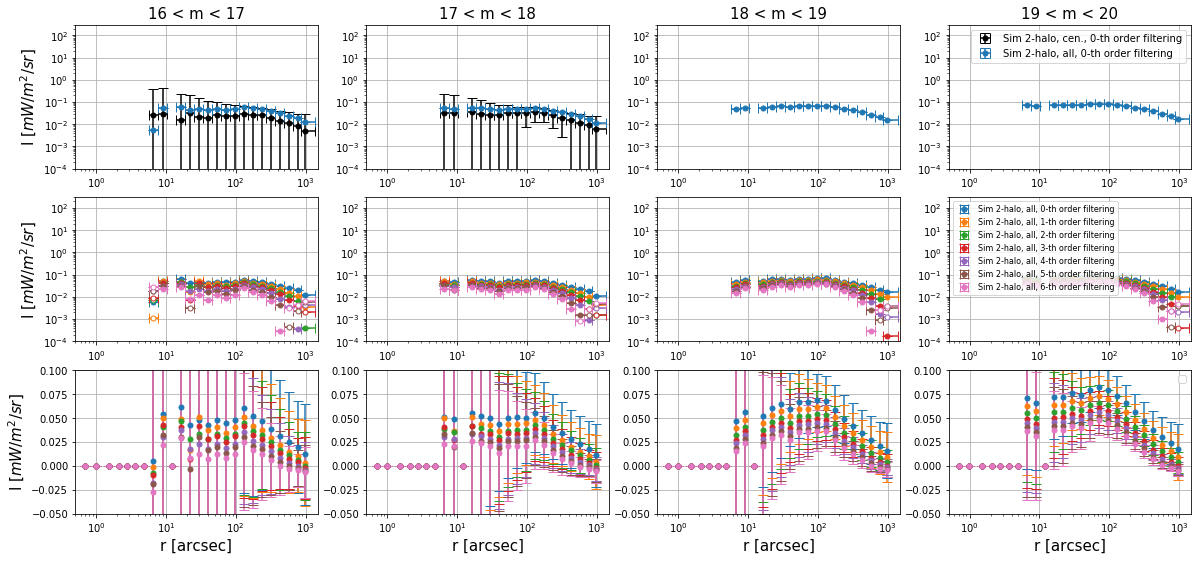

In [1]:
# run_micecat_auto_batch(inst, field(0~9), filt_order_arr=[0,1,2,3,4,5,6],
# mag_stack=[0,1], Mhcut=1e14, R200cut=0, zcut=0.15)

from micecat_auto import *

for inst in [1]:
    fig, ax = plt.subplots(3, 4, figsize = (20,9))
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):

        rbins, mc_avg, mc_std, _ = get_micecat_sim_auto(inst, im, filt_order=0,
                                                        run_type='cen', sub=False)
        plot_err_log(rbins, 
                 mc_avg, mc_std,
                 ax=ax[0][im], color='k',label='Sim 2-halo, cen., 0-th order filtering')

        rbins, mc_avg, mc_std, _ = get_micecat_sim_auto(inst, im, filt_order=0, sub=False)
        plot_err_log(rbins, 
                 mc_avg, mc_std*0,
                 ax=ax[0][im], color='C0',label='Sim 2-halo, all, 0-th order filtering')

        for i,filt_order in enumerate(range(7)):
            rbins, mc_avg, mc_std, data_all,icat_arr = get_micecat_sim_auto(inst, im,
                                                            filt_order=filt_order, sub=False,return_icat=True)
#             print(im, filt_order, data_all.shape,len(icat_arr))
            plot_err_log(rbins, 
                     mc_avg, mc_std*0,
                     ax=ax[1][im], color='C'+str(i),
                         label='Sim 2-halo, all, %d-th order filtering'%filt_order)
            ax[2][im].errorbar(rbins, mc_avg, mc_std, fmt ='.', color='C'+str(i),
                               capsize=5, markersize=10)
                
        ax[0][im].set_ylim([1e-4,3e2])
        ax[0][im].set_xlim([5e-1,1.5e3])
        ax[0][im].set_title('%d < m < %d'%(m_min, m_max), fontsize=15)
        ax[0][im].grid()    
        
        ax[1][im].set_ylim([1e-4,3e2])
        ax[1][im].set_xlim([5e-1,1.5e3])
        ax[1][im].grid()    
        
        ax[2][im].set_xscale('log')
        ax[2][im].set_ylim([-0.05,0.1])
        ax[2][im].set_xlim([5e-1,1.5e3])
        ax[2][im].grid()    
        ax[2][im].set_xlabel('r [arcsec]', fontsize=15)

    ax[0][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
    ax[0][-1].legend(fontsize=10)
    ax[1][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
    ax[1][-1].legend(fontsize=8)
    ax[2][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
    ax[2][-1].legend(fontsize=10)

fig.savefig('/Users/ytcheng/Desktop/micecat_filt.png',
             dpi = 150, bbox_inches='tight')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


42


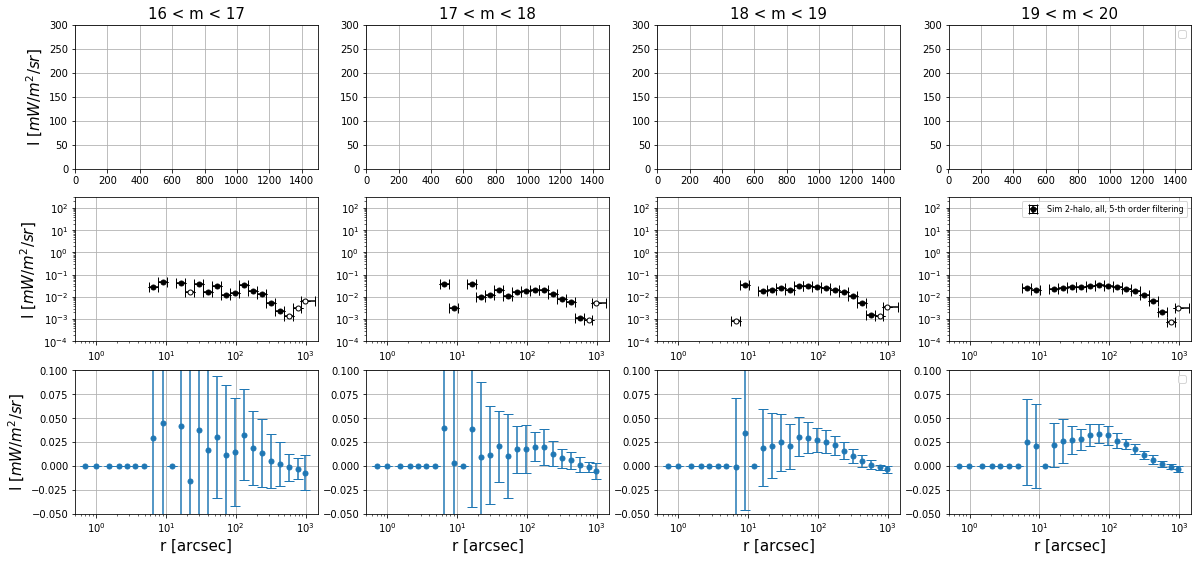

In [3]:
from micecat_auto import *

for inst in [2]:
    filt_order = filt_order_dict[inst]
    fig, ax = plt.subplots(3, 4, figsize = (20,9))
    for im,(m_min,m_max) in enumerate(zip(magbindict['m_min'],magbindict['m_max'])):

        rbins, mc_avg, mc_std, data_all,icat_arr = get_micecat_sim_auto(inst, im,
                                   filt_order=filt_order, sub=False,return_icat=True)
        plot_err_log(rbins, 
                 mc_avg, mc_std*0,
                 ax=ax[1][im],
                     label='Sim 2-halo, all, %d-th order filtering'%filt_order)
        ax[2][im].errorbar(rbins, mc_avg, mc_std, fmt ='.',
                           capsize=5, markersize=10)
                
        ax[0][im].set_ylim([1e-4,3e2])
        ax[0][im].set_xlim([5e-1,1.5e3])
        ax[0][im].set_title('%d < m < %d'%(m_min, m_max), fontsize=15)
        ax[0][im].grid()    
        
        ax[1][im].set_ylim([1e-4,3e2])
        ax[1][im].set_xlim([5e-1,1.5e3])
        ax[1][im].grid()    
        
        ax[2][im].set_xscale('log')
        ax[2][im].set_ylim([-0.05,0.1])
        ax[2][im].set_xlim([5e-1,1.5e3])
        ax[2][im].grid()    
        ax[2][im].set_xlabel('r [arcsec]', fontsize=15)
    
    print(len(icat_arr))
    
    ax[0][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
    ax[0][-1].legend(fontsize=10)
    ax[1][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
    ax[1][-1].legend(fontsize=8)
    ax[2][0].set_ylabel('I [$mW/m^2/sr$]', fontsize=15)
    ax[2][-1].legend(fontsize=10)

# fig.savefig('/Users/ytcheng/Desktop/micecat_filt.png',
#              dpi = 150, bbox_inches='tight')

# 2-Halo Model Fit

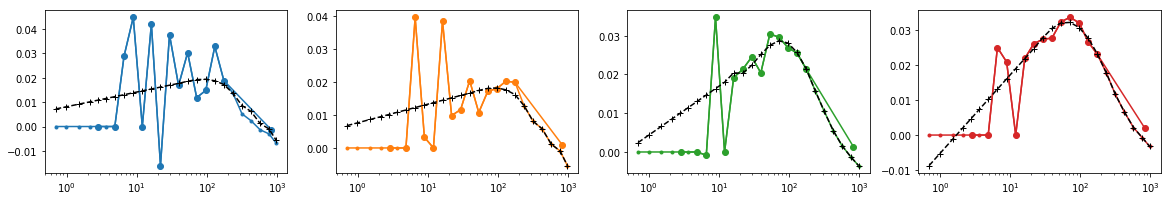

In [6]:
from micecat_auto import *

inst = 2
fig, ax = plt.subplots(1, 4, figsize = (20,3))
filt_order = filt_order_dict[inst]
for im in [0,1,2,3]:
    rbins, mc_avg, mc_avg_fit, rsubbins, mc_avgsub, mc_avgsub_fit = \
        micecat_profile_fit(inst, im, filt_order=filt_order, return_full=True)    
    ax[im].semilogx(rbins, mc_avg,'.-',c='C'+str(im))
    ax[im].semilogx(rsubbins, mc_avgsub,'o-',c='C'+str(im))
    ax[im].semilogx(rbins, mc_avg_fit,'+--',c='k')

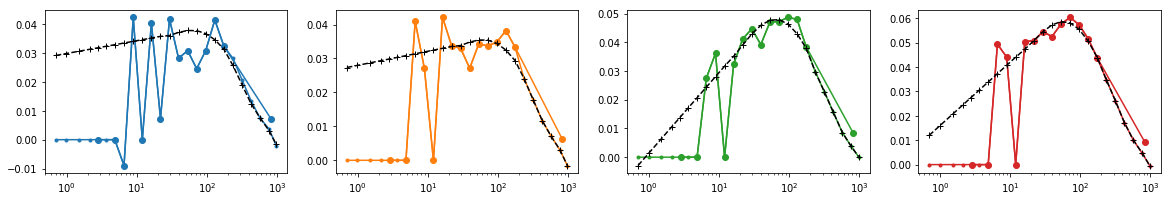

In [25]:
from micecat_auto import *

inst = 1
for filt_order in range(7):
    if filt_order==3:
        fig, ax = plt.subplots(1, 4, figsize = (20,3))
    for im in [0,1,2,3]:
        rbins, mc_avg, mc_avg_fit, rsubbins, mc_avgsub, mc_avgsub_fit = \
            micecat_profile_fit(inst, im, filt_order=filt_order, return_full=True)    
        if filt_order==3:
            ax[im].semilogx(rbins, mc_avg,'.-',c='C'+str(im))
            ax[im].semilogx(rsubbins, mc_avgsub,'o-',c='C'+str(im))
            ax[im].semilogx(rbins, mc_avg_fit,'+--',c='k')

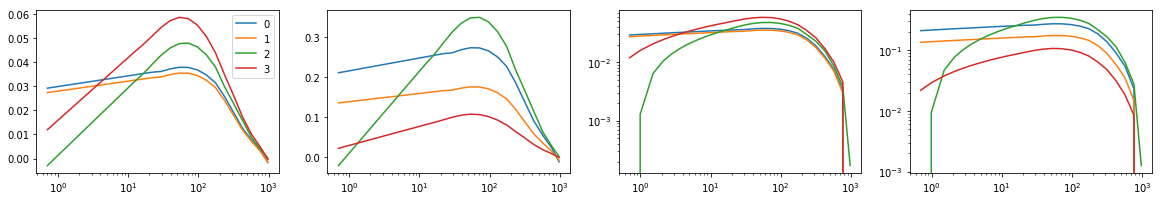

In [20]:
from micecat_auto import *
from run_fit import *
inst = 1
for filt_order in [3]:
    if filt_order==3:
        fig, ax = plt.subplots(1, 4, figsize = (20,3))
    for im in [0,1,2,3]:
        fitparamdat = get_mcmc_fit_params_3par(inst,im)
        Re2, A1h, A2h = fitparamdat['Re2'], fitparamdat['A1h'], fitparamdat['A2h'],
        rbins, mc_avg, mc_avg_fit, rsubbins, mc_avgsub, mc_avgsub_fit = \
            micecat_profile_fit(inst, im, filt_order=filt_order, return_full=True)    
        ax[0].semilogx(rbins, mc_avg_fit,'-',label='%d'%im)
        ax[1].semilogx(rbins, mc_avg_fit*A2h,'-',label='%d'%im)
        ax[2].loglog(rbins, mc_avg_fit,'-',label='%d'%im)
        ax[3].loglog(rbins, mc_avg_fit*A2h,'-',label='%d'%im)

ax[0].legend()